<a href="https://colab.research.google.com/github/Babyboo03/Theresa-Hart/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Choosing a data set#


**I downloaded my data sets alcohol consumption from https://github.com/fivethirtyeight/data/tree/master/**



**Importing Data**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#2. Data Analysis

**Using describe() or info() to get an insight into the data set as a whole**

In [ ]:
df = pd.read_csv("drinks.csv")


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB
None


It looks like there are no missing values

In [ ]:
df_input = df[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]].dropna()
df_input

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9
...,...,...,...,...
188,333,100,3,7.7
189,111,2,1,2.0
190,6,0,0,0.1
191,32,19,4,2.5


In [ ]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
country_series = df["country"]
country_series

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

**I got information on the pandas series by using the describe() method**.

In [ ]:
print(country_series.describe())

count          193
unique         193
top       Malaysia
freq             1
Name: country, dtype: object


To obtain the summary statistics over the whole dataframe I used the following code

**Analysing the relationships between variables, using correlations**

I calculated the correlation between beer and spirit servings to see if thre's any relatioship between them

In [ ]:
df["beer_servings"].corr(df["wine_servings"])

0.5271716935065213

This implies that there's no relationship between the two variables.



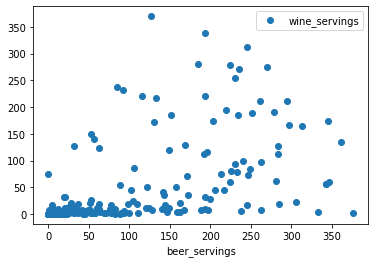

In [ ]:
df.plot(x="beer_servings", y="wine_servings", style="o")

**I compared the relationship between beer and and pure alchohol servings using the code**

In [ ]:
df["beer_servings"].corr(df["total_litres_of_pure_alcohol"])

0.8358386279352704

**This implies a positive linear relationship between the two variables.**

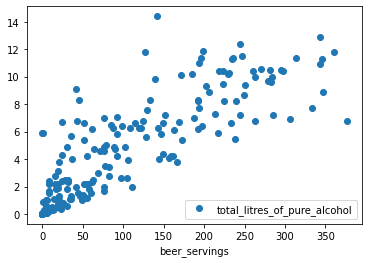

In [ ]:
df.plot(x="beer_servings", y="total_litres_of_pure_alcohol", style="o")

In [ ]:
df["beer_servings"].corr(df["total_litres_of_pure_alcohol"])

0.8358386279352704

 I applied logarithmic transformation to transform the data becuase it is not uniform distributed

I will calculate again the spirit and wine servings using the logarithmic

In [ ]:
df["log(beer_servings)"] = np.log(df["beer_servings"])

In [ ]:
df["log(beer_servings)"]

0          -inf
1      4.488636
2      3.218876
3      5.501258
4      5.379897
         ...   
188    5.808142
189    4.709530
190    1.791759
191    3.465736
192    4.158883
Name: log(beer_servings), Length: 193, dtype: float64

In [ ]:
df["log(beer_servings)"].corr(df["wine_servings"])

nan

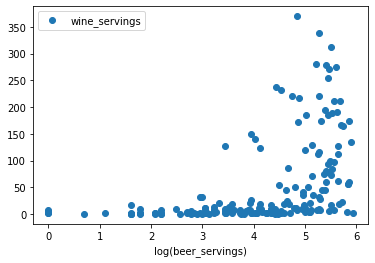

In [ ]:
df.plot(x="log(beer_servings)", y="wine_servings", style="o")

The relationship between wine serving and litres of pure alcohol depicts no correlation

#Investigating categorical fields and most frequent occurring values#

**Analysing the categorical columns to look for any interesting fields for feature engineering**


In [ ]:
country_series = df["country"]
country_series

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [ ]:
print(country_series.describe())

count          193
unique         193
top       Malaysia
freq             1
Name: country, dtype: object


**I used counts to determine how many times each value exists in the series**

In [ ]:
df["country"].value_counts()

Malaysia                1
Montenegro              1
South Africa            1
Antigua & Barbuda       1
Guinea-Bissau           1
                       ..
Mauritius               1
United Arab Emirates    1
Philippines             1
Spain                   1
Brazil                  1
Name: country, Length: 193, dtype: int64

#Looking at the distributions of numerical fields#


In [ ]:
print(df.columns)

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'log(beer_servings)'],
      dtype='object')


**I Chose a numeric column and created a series array variable**.

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit_servings, dtype: float64


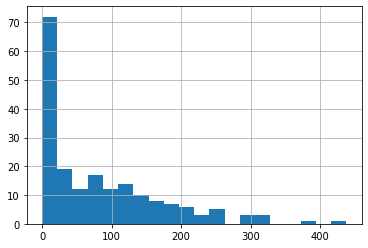

In [ ]:
spirit_servings = df["spirit_servings"]
print(spirit_servings.describe())

spirit_servings.hist(bins =20)

In [ ]:
# Filter
df_f = df[df["country"] == "total_litres_of_pure_alcohol"]

# Sort by total litres of of pure alcohol 
df_f = df_f.sort_values("total_litres_of_pure_alcohol", ascending=False, axis=0)
df_f

# Choose top 10
df_f[:10]



,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,log(beer_servings)


**I applied grouping and group-based analysis to get more granular insight to a whole dataset.** 

In [ ]:
df.groupby(["country"])

In [ ]:
df.groupby(["country"])[["beer_servings"]].mean().sort_values(["beer_servings"], axis=0)

,beer_servings
country,
Afghanistan,0
Somalia,0
Saudi Arabia,0
San Marino,0
Pakistan,0
...,...
Lithuania,343
Germany,346
Gabon,347


**This shows that Namibia has the highest score in beer servings**

In [ ]:
df.groupby(["country"])[["wine_servings"]].mean().sort_values(["wine_servings"], axis=0)

,wine_servings
country,
Afghanistan,0
India,0
Indonesia,0
Iran,0
Iraq,0
...,...
Denmark,278
Switzerland,280
Andorra,312


**This shows that France has the highest score in wine servings**

#3. Feature Engineering#

#Data Imputation

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   log(beer_servings)            193 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ KB


**I can see from here that there are no missing values from the entries**

## **Data Type Conversions**

Some series (features) may need to be converted into a different data type to aid with modelling the data.

Often this involves converting strings to numeric columns but can also involve conversions between numeric types themselves.

In [ ]:
df["spirit_servings"] = df["spirit_servings"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   log(beer_servings)            193 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ KB


#Data transformation

 **Numerical transformations**

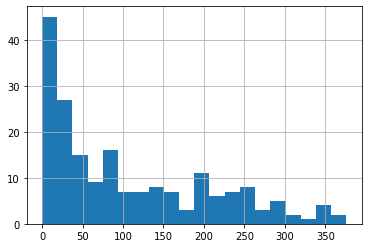

In [ ]:
df["beer_servings"].hist(bins=20)

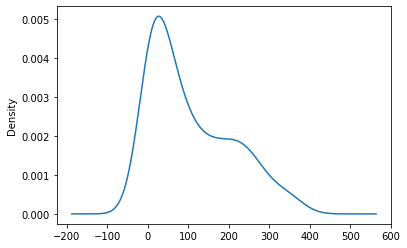

In [ ]:
df["beer_servings"].plot.kde()

**The beer servings is not normal or uniformly distributed, it has a long tail with very high beer intake compared to the vast majority. It looks like we need to transform this series**

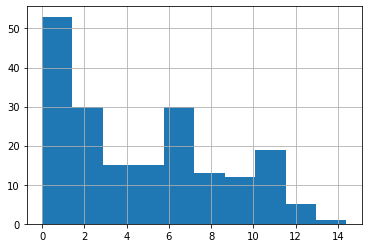

In [ ]:
df["total_litres_of_pure_alcohol"].hist()

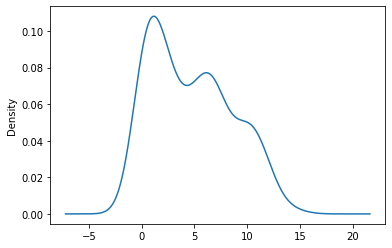

In [ ]:
df["total_litres_of_pure_alcohol"].plot.kde()

**The total litres of pure alcohol is not normal or uniformly distributed, It looks like we need to transform this series**

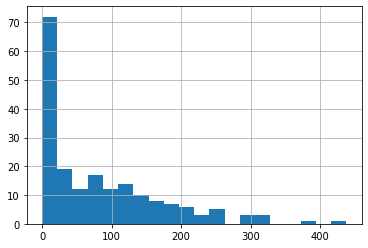

In [ ]:
df["spirit_servings"].hist(bins=20)

In [ ]:
df["log(beer_servings)"] = np.log(df["beer_servings"])
df["log(total_litres_of_pure_alcohol)"] = np.log(df["total_litres_of_pure_alcohol"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Categorical Encoding**

I am choosing categorical columns Category and State to look at. I used Ordinal encoding for Category as it has few unique values. I used One-hot encoding for State as it has over 20 unique values. This may cause weighting issues in the model so it might reduce model accuracy. Please see code below:

**One-Hot-Encoding**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df["country_copy"] = df["country"]

In [ ]:
df["country_copy"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', "Cote d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'North Korea', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana',

The one-hot encoding operation in Pandas is **pd.get_dummies()**.

In [ ]:
df = pd.get_dummies(df, drop_first=True, columns=["country_copy"], prefix="country")
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,log(beer_servings),log(total_litres_of_pure_alcohol),country_Albania,country_Algeria,country_Andorra,country_Angola,country_Antigua & Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia,country_Bosnia-Herzegovina,country_Botswana,country_Brazil,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,...,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_Spain,country_Sri Lanka,country_St. Kitts & Nevis,country_St. Lucia,country_St. Vincent & the Grenadines,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad & Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_USA,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,Afghanistan,0,0,0,0.0,-inf,-inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,89,132,54,4.9,4.488636,1.589235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Algeria,25,0,14,0.7,3.218876,-0.356675,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andorra,245,138,312,12.4,5.501258,2.517696,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Angola,217,57,45,5.9,5.379897,1.774952,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,5.808142,2.041220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
189,Vietnam,111,2,1,2.0,4.709530,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
190,Yemen,6,0,0,0.1,1.791759,-2.302585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
191,Zambia,32,19,4,2.5,3.465736,0.916291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#Ordinal Encoding

In [ ]:
map_dict = {}

In [ ]:
df["country_ordinal"] = df["country"].replace(map_dict)

In [ ]:
df["country_ordinal"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', "Cote d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'North Korea', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana',

#Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:


df = df[["country", "beer_servings", "spirit_servings", ]]
df

,country,beer_servings,spirit_servings
0,Afghanistan,0,0
1,Albania,89,132
2,Algeria,25,0
3,Andorra,245,138
4,Angola,217,57
...,...,...,...
188,Venezuela,333,100
189,Vietnam,111,2
190,Yemen,6,0
191,Zambia,32,19


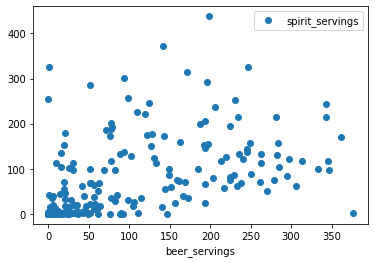

In [ ]:
df.plot(x="beer_servings", y="spirit_servings", style="o")

In [ ]:
train_df, test_df = train_test_split(df[["beer_servings", "spirit_servings"]], train_size=0.7, test_size=0.3)
print("Number of records in train sample:", len(train_df))
print("Number of records in test sample:", len(test_df))

Number of records in train sample: 135
Number of records in test sample: 58


In [ ]:
train_df.describe()

,beer_servings,spirit_servings
count,135.000000,135.000000
mean,105.829630,81.251852
std,102.425695,84.863782
min,0.000000,0.000000
25%,21.000000,4.000000
50%,69.000000,61.000000
75%,172.000000,132.000000
max,376.000000,326.000000


In [ ]:
X_train = train_df["beer_servings"].values.reshape(-1, 1) #.values.reshape(-1, 1) is used when you only have one exploratory variable!
y_train = train_df["spirit_servings"]

X_test = test_df["beer_servings"].values.reshape(-1, 1)
y_test = test_df["spirit_servings"]

## **Linear Regression**

Linear Regression is a regression model that can be trained to predict a target value using a number of training/exploratory variables.

It is a linear model (hence the name) that models linear relationships between the target and the exploratory variables.

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression


I trained the model

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("R^2 score on training set:", model.score(X_train, y_train)) #df["beer_servings"].corr(df["spirit_servings"])

R^2 score on training set: 0.18821097703491163


We can also use the Mean Absolute Error (MAE) metric to measure the performance of the model

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_train_pred = model.predict(X_train)

print("MAE score on training set:", mean_absolute_error(y_train, y_train_pred))

MAE score on training set: 58.42066861108481


The coefficients of the linear model, shown earlier in the mathematical equation representing the model, can be found using the following code

In [ ]:
print("Intercept (B0) =", model.intercept_)
print("beer_servings coefficient (B1)", "=", model.coef_[0])

Intercept (B0) = 43.21161494115008
beer_servings coefficient (B1) = 0.35944788849616705


Let's plot the training data on a graph and overlay the Linear Regression model

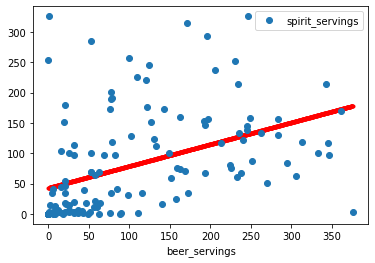

In [ ]:
ax = train_df.plot(x="beer_servings", y="spirit_servings", style="o") # Plot the data - beer vs spirits from the dataframe

# I created the best fit line and plot it over the graph
xx = np.linspace(train_df["beer_servings"].min(), train_df["beer_servings"].max(), 1000)

# I used the equation y = b0 + b1*x to predict values of y (Beer Servings) using the 1000 values of x (Spirit Servings) above
yy = model.intercept_ + model.coef_[0] * xx

# Plotting the line over the data
ax.scatter(xx, yy, color="red", marker='.')



The model appears not to provide a good fit. 

### **Validating the model**

Now we need to see if the model is equally as accurate with unseen test data.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_test_pred = model.predict(X_test)

print("R^2 score on test set:", r2_score(y_test, y_test_pred))

R^2 score on test set: 0.2195802332136355


In [ ]:
print("MAE score on test set:", mean_absolute_error(y_test, y_test_pred))

MAE score on test set: 65.77014304130327


They are fairly consistent across both sets - this implies that the model can generalise well on unseen data. This is an ideal scenario for us and vital when creating models for clients and future usage!

Let's take a few countries from the dataframe and see how close the Spirit servings prediction is to the known value.

Australia
Brazil
Cameroun
Ghana
Spain

In [ ]:
df_new_test = df[df["country"].isin(["Australia", "Brazil", "Cameroun", "Ghana", "Spain"])]

df_orig_vals = df_new_test[["country", "spirit_servings"]]
df_orig_vals

,country,spirit_servings
8,Australia,72
23,Brazil,145
66,Ghana,3
160,Spain,157


We can predict the values using the model and then compare our predictions to the known Spirit servings

In [ ]:
y_new_pred = model.predict(df_new_test["beer_servings"].values.reshape(-1, 1))

Let's compare the actual and predicted alcohol servings values 

In [ ]:
for country, spirit_servings, prediction in zip(df_orig_vals["country"], df_orig_vals["spirit_servings"], y_new_pred):
  print(country, "- spirit_servings:", spirit_servings, ", Prediction:", prediction)

Australia - spirit_servings: 72 , Prediction: 125.30789043688746
Brazil - spirit_servings: 145 , Prediction: 120.02787908425499
Ghana - spirit_servings: 3 , Prediction: 49.40772724279575
Spain - spirit_servings: 157 , Prediction: 132.8979067562966


The results are not perfect, it over-predicts Ghana  but under predicted Spain amd brazil.